Summary :
* [Chapter 1 - Compute in the cloud](#chapter-1--compute-in-the-cloud)
* [Chapter 2 - Global infrastructure](#chapter-2--global-infrastructure)
* [Chapter 3 - Networking](#chapter-3--networking)
* [Chapter 4 - Database storage](#chapter-4--databases--storage)
* [Chapter 5 - Security](#chapter-5--security)
* [Chapter 6 - Monitoring analytics](#chapter-6--monitoring--analytics)
* [Chapter 7 - Pricing support](#chapter-7--pricing--support)
* [Chapter 8 - Migration innovation](#chapter-8--migration--innovation)
* [Chapter 9 - Well Architected](#chapter-9--well-architected)
* [Chapter 10 - Exam](#chapter-10--exam)

Important resources : 
* AWS Fundamentals: Core Concepts https://aws.amazon.com/fr/getting-started/cloud-essentials/
* Cloud Adoption Framework : https://d1.awsstatic.com/whitepapers/aws-caf-ebook.pdf

## CHAPTER 1 : COMPUTE IN THE CLOUD

**Elastic Cloud Computing**\
Amazon Elastic Compute Cloud (Amazon EC2) provides secure, resizable compute capacity in the cloud as Amazon EC2 instances.
When you spin up an EC2 instance, you aren't necessarily taking an entire host to yourself. Instead, you are sharing the host with multiple other instances, otherwise known as virtual machines. And a hypervisor running on the host machine is responsible for sharing the underlying physical resources between the virtual machines.

------------------------------------------------------------------------
📌**Describe the benefits of Amazon EC2 at a basic level**
- Multitenancy = sharing underlying hardware between virtual machines (virtualization). The hypervisor is responsible for coordinating this multitenancy and it is managed by AWS.
- Vertical scaling
- Control the networking aspect of EC2. So what type of requests make it to your server and if they are publicly or privately accessible is something you decide.

------------------------------------------------------------------------
📌**Identify the different Amazon EC2 instance types**\
Each instance type is grouped under an instance family and are optimized for certain types of tasks. Instance types offer varying combinations of CPU, memory, storage, and networking capacity, and give you the flexibility to choose the appropriate mix of resources for your applications
- **General purpose** (balanced resources such as web servers or code repository, ex : M7)
- **Compute optimized** (compute intensive tasks such as batch processing, gaming servers, high perf computing, scientific modeling, ex : C7g)
- **Memory optimized** (for workloads that process large datasets in memory, ex: R7g)
- **Accelerate computing** (floating point number calculations, graphics processing, ..., ex : P5)
- **Storage optimized** (OLTP, DWH, ex: 14g)

------------------------------------------------------------------------
📌**Differentiate between the various billing options for Amazon EC2**
- **On-Demand** : you only pay for the duration that your instance runs for. Ideal for short-term, irregular workloads that cannot be interrupted (ex: developing & testing new apps)
- **Savings Plans** : low prices on EC2 usage in exchange for a commitment to a consistent amount of usage measured in dollars per hour for a one or three-year term. Unlike Reserved Instances, however, you don't need to specify up front what EC2 instance type and size (for example, m5.xlarge), OS, and tenancy to get a discount. Additionally, the EC2 Instance Savings Plans don't include an EC2 capacity reservation option.
- **Reserved Instances** : for steady-state workloads or ones with predictable usage. You qualify for a discount once you commit to a 1 or 3-year term. Reserved Instances require you to state : instance type and size, OS, tenancy, Region
- **Spot Instances** : up to 90% off of the On-demand price BUT AWS can reclaim the instance at any time they need it, giving you a two-minute warning to finish up work and save stat. Ideal for workloads with flexible start and end times, or that can withstand interruptions (ex: batch workloads)
- **Dedicated Hosts** : physical hosts dedicated for your use for EC2 that run in a Virtual Private Cloud (ex: meeting certain compliance requirements)

------------------------------------------------------------------------
📌 **Benefits of Amazon EC2 Auto Scaling**\
Scalability involves beginning with only the resources you need and designing your architecture to automatically respond to changing demand by scaling out or in.
Amazon EC2 Auto Scaling :  enables to automatically add or remove Amazon EC2 instance in response to changing application demand. 
- Dynamic scaling responds to changing demand.
- Predictive scaling automatically schedules the right number of Amazon EC2 instances based on predicted demand.
- High availability
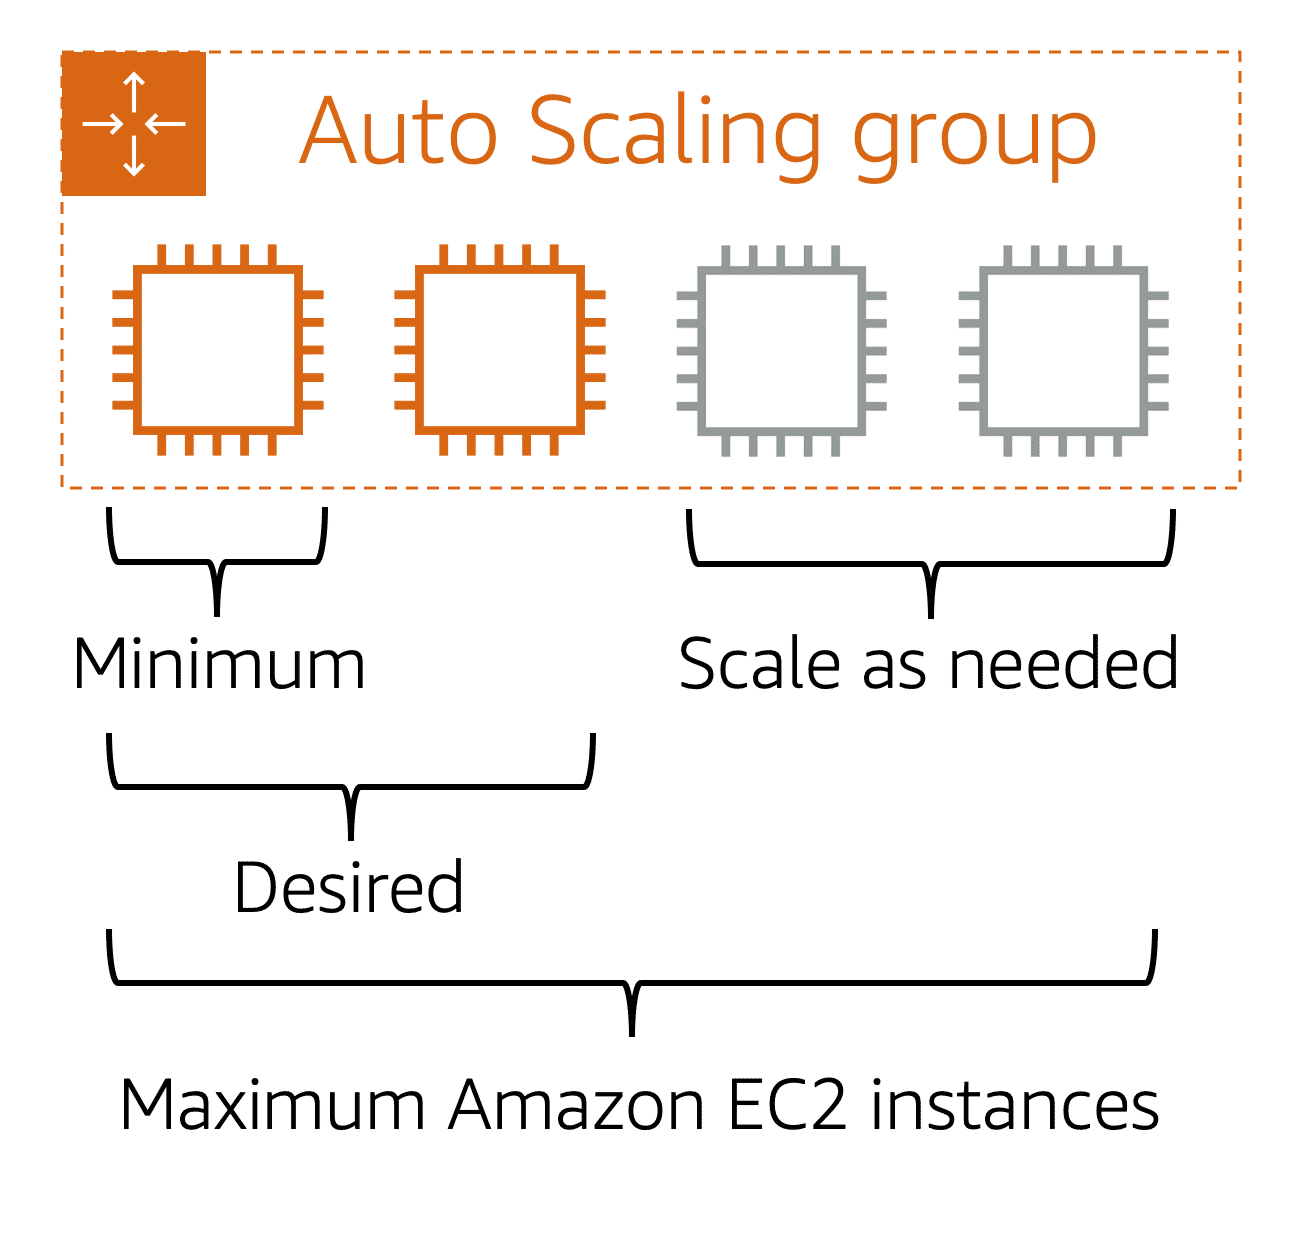
------------------------------------------------------------------------
📌 **Benefits of Elastic Load Balancing (ELB)** \
Elastic Load Balancing is the AWS service that automatically distributes incoming application traffic across multiple resources, such as Amazon EC2 instances.
A load balancer is an application that 1) takes in requests from incoming traffic and 2) routes them to the instances that will handle them (EC2 instance for ex).
It is a "managed service", "regional construct" that runs on a Region level, thus the service is automatically highly available with no additional effort on your part. 
Although Elastic Load Balancing and Amazon EC2 Auto Scaling are separate services, they work together to help ensure that applications running in Amazon EC2 can provide high performance and availability. 
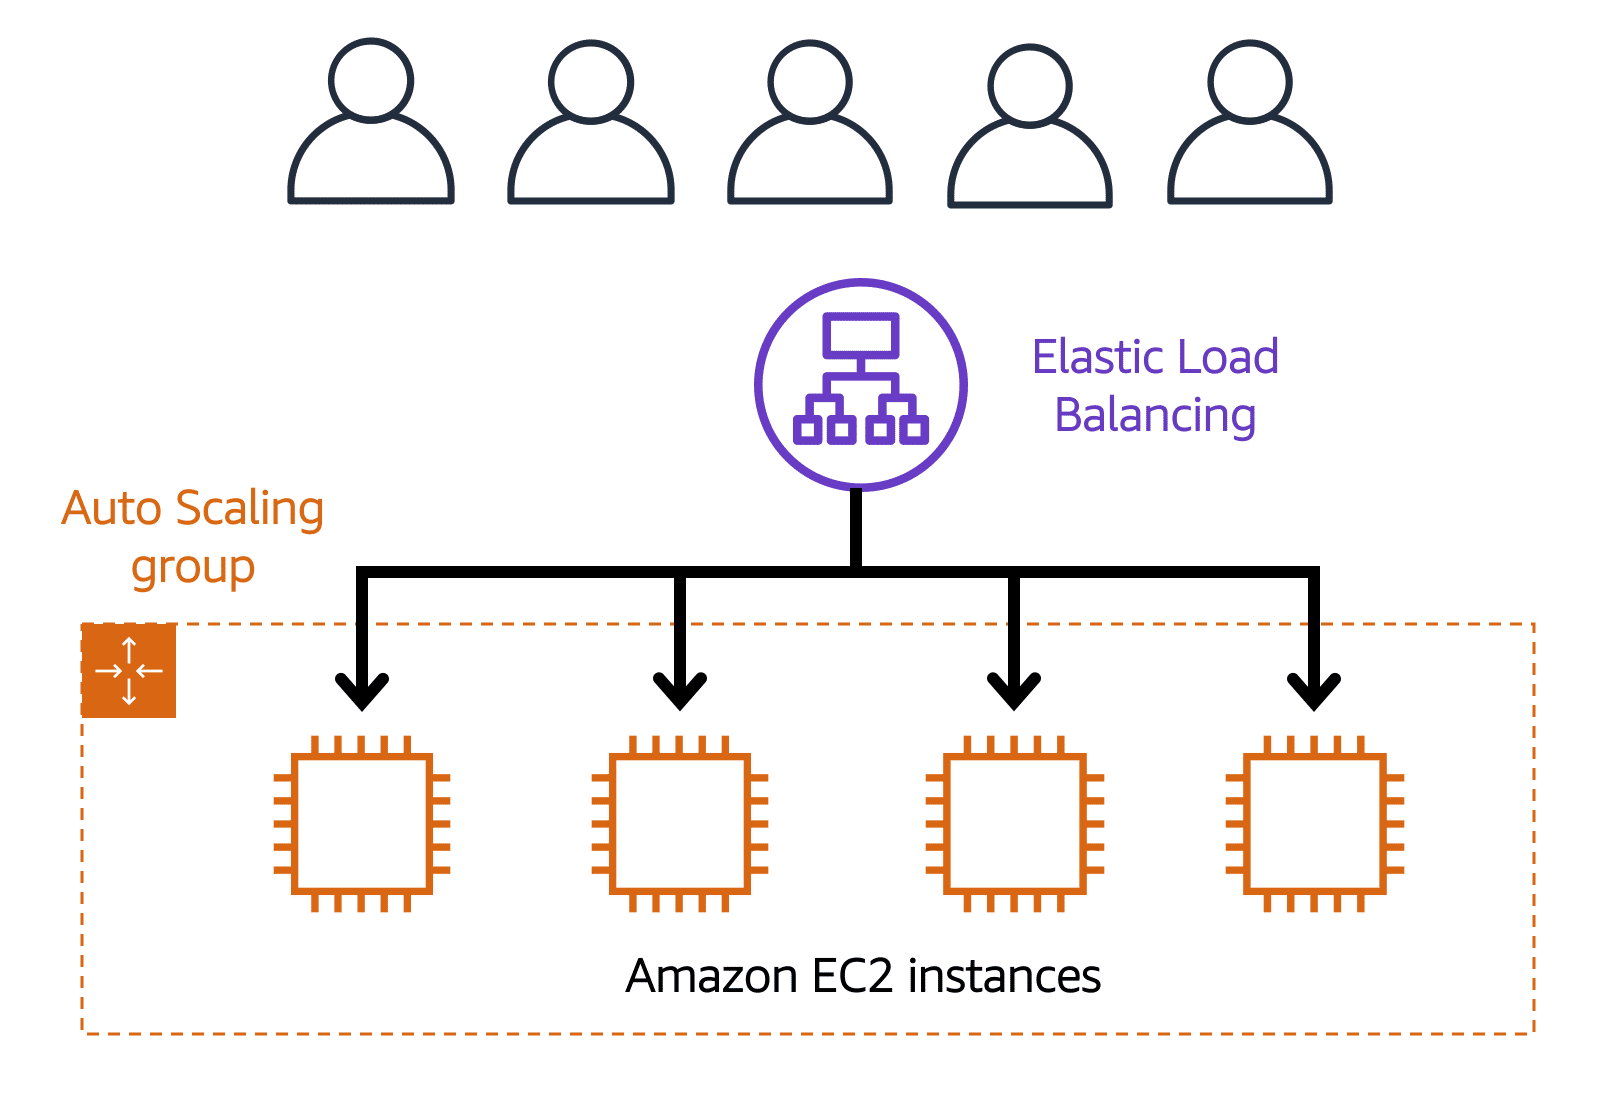
- Decoupled architecture (between front end and back end with a load balancer between them)

------------------------------------------------------------------------
📌**Messaging and Queuing**\
✅Loosely coupled architecture : with a buffer (SNS or SQS) between two applications/components. Single failure won't cause cascading failures.\
❌Tightly coupled architecture : if two applications/components talk diectly to each other.

- Amazon Simple Queue Service (Amazon SQS) : allows to send, store in a SQS queue, and receive messages between software components at any volume. A user or service retrieves a message from the queue, processes it, and then deletes it from the queue. The data contained within a message is called a payload. Scale automatically, reliable, easy to configure and use. (ex : fulfilling a coffee order with client, cashier and barista).  It does not use the message subscription and topic model that is involved with Amazon SNS.
- Amazon Simple Notification Service (Amazon SNS) : Pub-Sub model by creating a SNS topic (=channel for messages to be delivered). Subscribers can be  web servers, email adresses, endpoints such as SQS queues, AWS Lambda functions, and HTTPS or HTTP web hooks. (ex : Newsletter)

------------------------------------------------------------------------
📌**Additional AWS compute options**\
Serveless compute option where you cannot actually see or access the underlying infrastructure or instances that are hosting your application. Instead, all the management of the underlying environment from a provisioning, scaling, high availability, and maintenance perspective are taken care of for you. All you need to do is focus on your application and the rest is taken care of. The term “serverless” means that your code runs on servers, but you do not need to provision or manage these servers. 

**AWS Lambda** : upload your code into what's called a Lambda function, configure a trigger and from there, the service waits for the trigger. It is suited for quick processing (each request takes less than 15 minutes to complete). If you are looking to host short running functions, service-oriented or event driven applications and you don't want to manage the underlying environment at all, look into the serverless AWS Lambda. While using AWS Lambda, you pay only for the compute time that you consume. Charges apply only when your code is running.

Container orchestration tools that runs on top of EC2 : 
- **Amazon Elastic Container Service (ECS)** : Docker containers that runs on EC2 instance (this is the host)
- **Amazon Elastic Kubernetes Service (EKS)** : similar but uses different tolling and features.
Container orchestration services help you to deploy, manage, and scale your containerized applications.

After you choose your orchestration tool, you then need to chose your platform. Do you want to run your containers on EC2 instances that you manage or in a serverless environment like AWS Fargate that is managed for you? 
**AWS Fargate** :  a serverless compute platform for ECS or EKS

## CHAPTER 2 : GLOBAL INFRASTRUCTURE

📌**Benefits of the AWS Global Infrastructure**\
Ensure High availability and fault tolerance.
Regions = a group of datacenters that is geographically isolated.
One region contains 3 or more AZs.
AZ = Availability Zones. Each Availability Zone is one or more discrete data centers with redundant power, networking, and connectivity. 
Each AWS Region consists of multiple isolated and physically separate Availability Zones within a geographic Region.
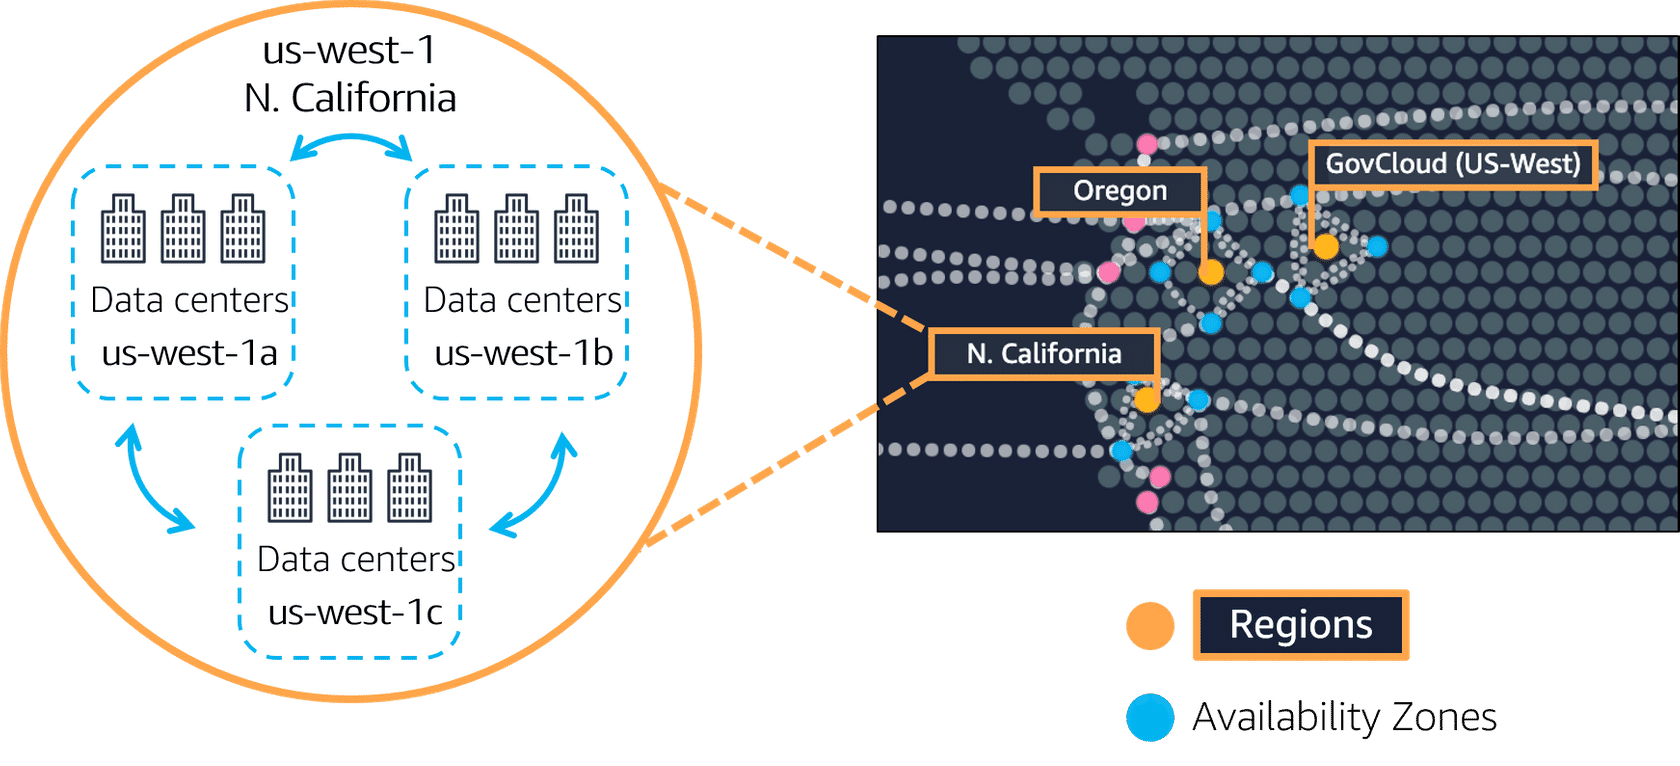
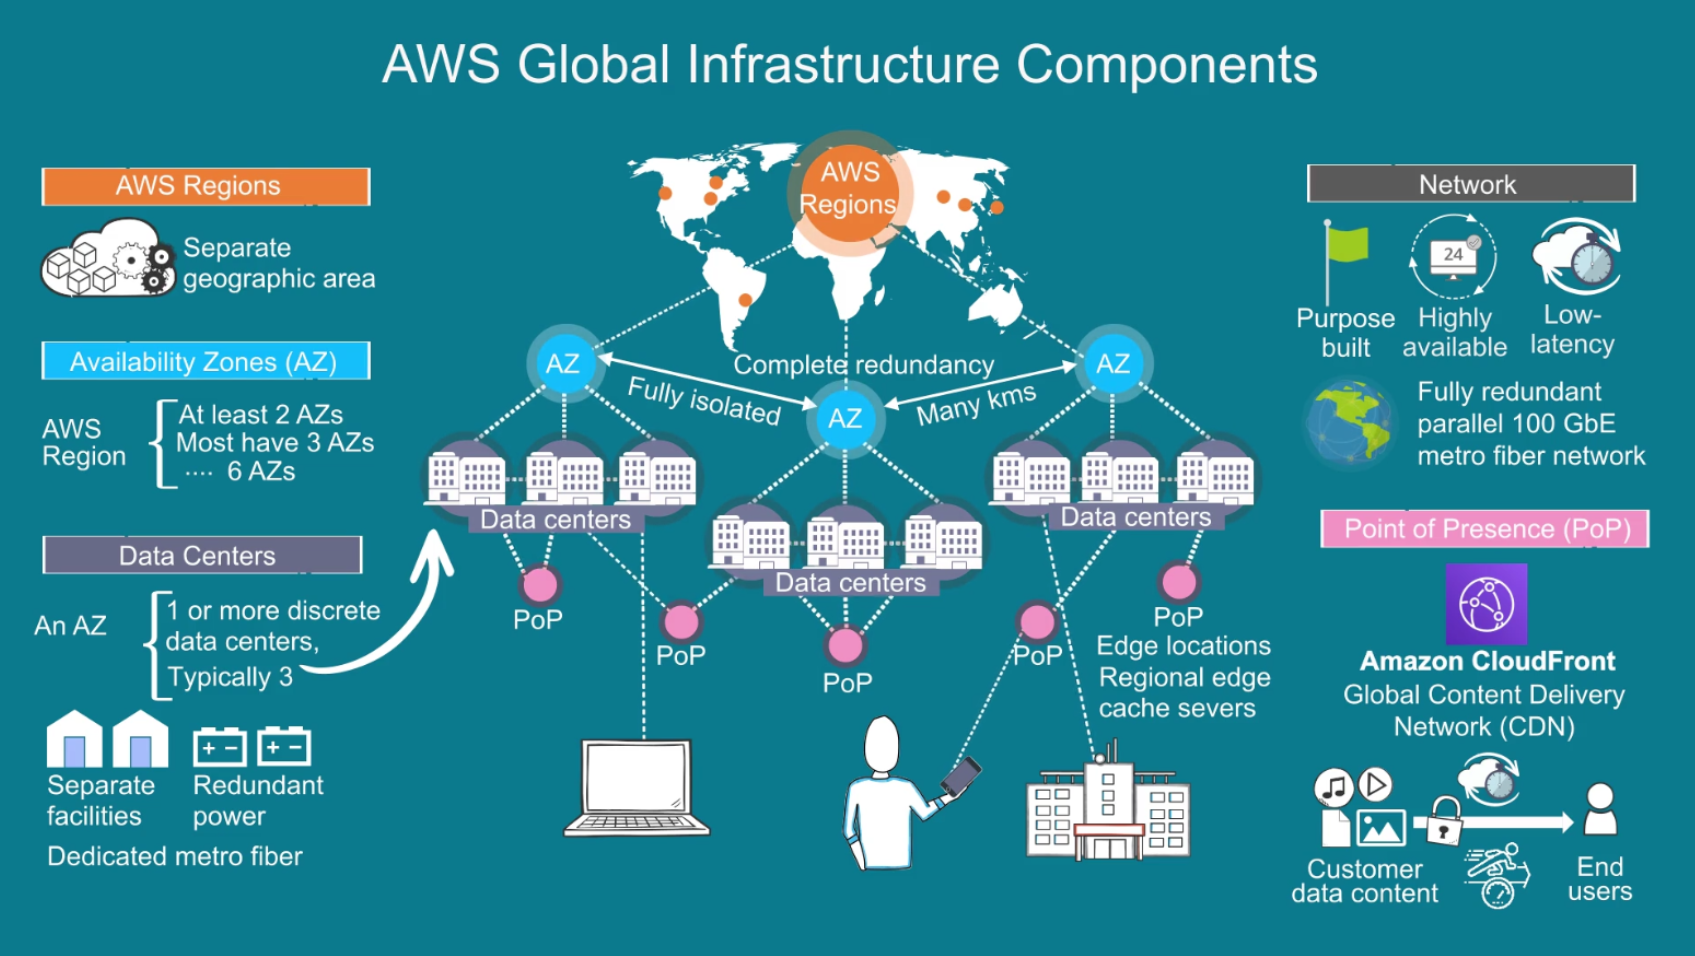
Regional services are by definition already highly available at no additional cost of effort on your part. 

Best practice : redundantly deploying your infrastructure in two different AZs. 

Each region is isolated from every other region.
How to choose a region ? 
1) Compliance requirements (ex: RGPD)
2) Proximity (for latency)
3) Feature availability
4) Pricing
------------------------------------------------------------------------
📌**Benefits of Amazon CloudFront and edge locations**\

CDN = Content Delivery Network = caching copies of data closer to the customers all around the world 

Amazon CloudFront (=a CDN) is a service that helps deliver data, video, applications, and APIs to customers around the world with low latency and high transfer speeds

An Edge location is a site that Amazon CloudFront uses to store cached copies of your content closer to your customers for faster delivery. 
AWS Edge locations, also run more than just CloudFront. They run a domain name service, or DNS, known as Amazon Route 53, helping direct customers to the correct web locations with reliably low latency.

AWS Outposts = AWS will basically install a fully operational mini Region, right inside your own data center (on-premise).

------------------------------------------------------------------------
📌**Compare different methods for provisioning AWS services**\
Interacting with AWS services (APIs) through : 
- AWS Management Console = Web Interface
- AWS Command Line Interface = Send API calls using the commands on the terminal on your machine
- AWS Software Development Kits (SDK) = Interact with AWS resources through various programming languages. Example SDK Python = Boto3
- various other tools : 
      * AWS Elastic Beanstalk by proving code and config settings, then Beanstalk deploys the resources necessary to perfom capcity, load balancing, auto scaling, monitoring
      * AWS CloudFormation : Infrastructure as code tool used to define a wide variety of AWS resources via .yml templates. Allow to to frequently build your infrastructure and applications without having to perform manual actions

## CHAPTER 3 : NETWORKING

📌**Basic concepts of networking** 

**VPC** = Virtual Private Cloud =  is essentially your own private network in AWS. It lets you provision a logically isolated section of the AWS Cloud where you can launch AWS resources in a virtual network that you define. These resources can be public facing so they have access to the internet, or private with no internet access, usually for backend services like databases or application servers. The public and private grouping of resources are known as subnets and they are ranges of IP addresses in your VPC. 

**Subnets** = range of IP addresses in your VPC that allow you to group resources together based on security or operational needs. It is a section of a VPC that can contain resources such as Amazon EC2 instances. A subnet must reside in a single Availability Zone. In a VPC, subnets can communicate with each other.
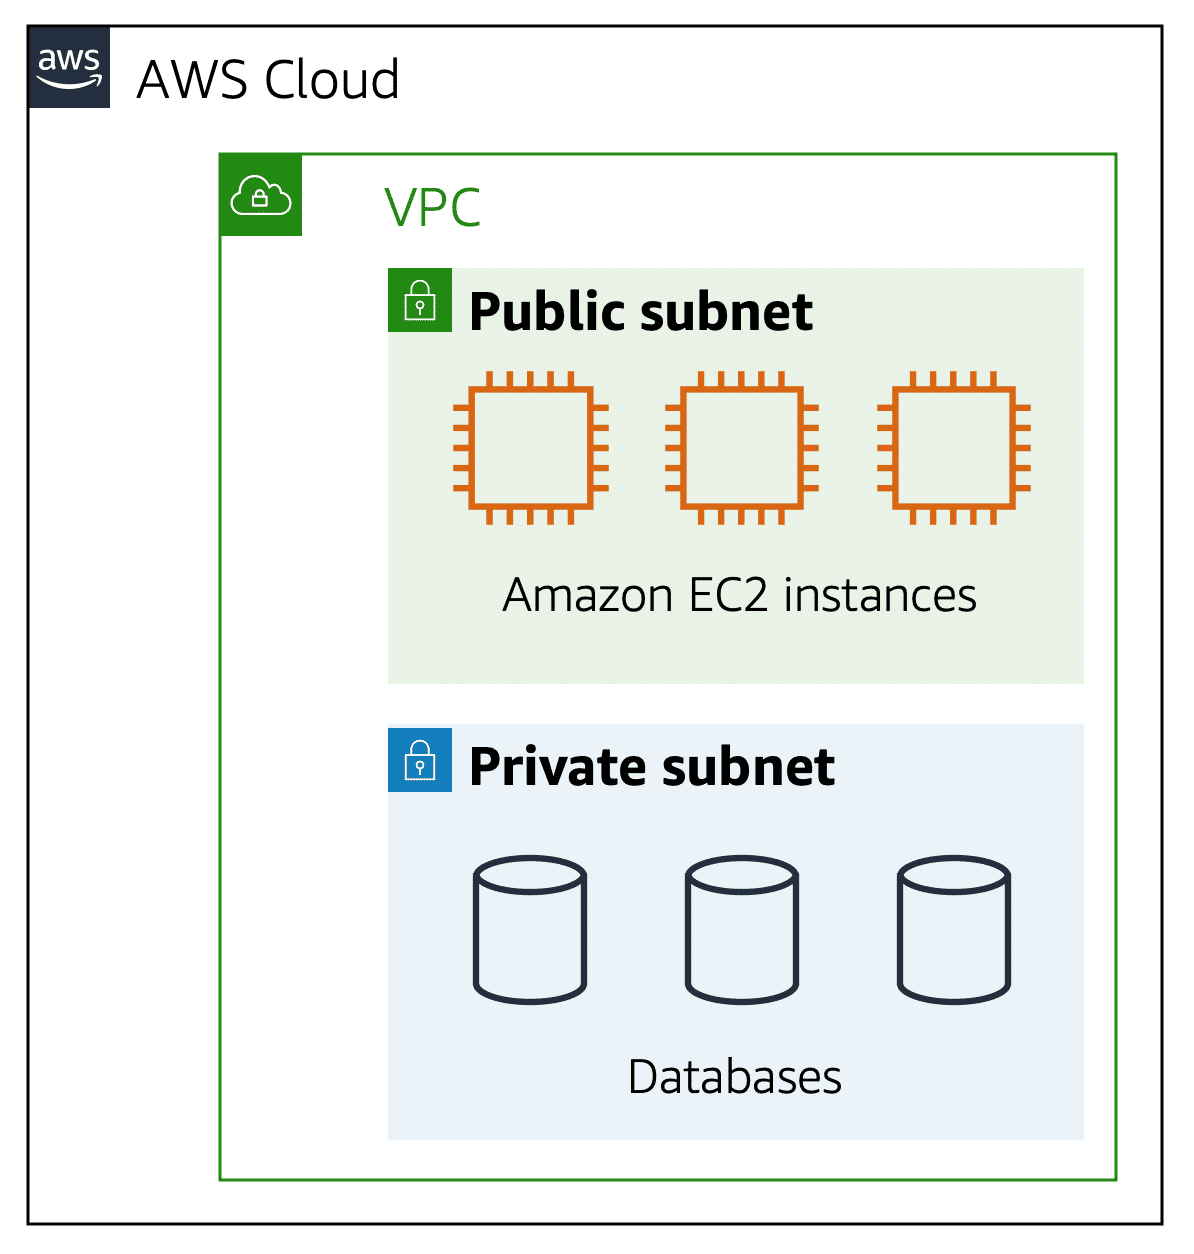

**Network ACL** = Access Control List = subnet level security access. Packets are messages from the internet, and every packet that crosses the subnet boundaries gets checked against something called a network access control list or network ACL. This check is to see if the packet has permissions to either leave or enter the subnet based on who it was sent from and how it's trying to communicate. Network ACLs check traffic going into and leaving a subnet. it is "stateless" (no memory, it checks every single packet that crosses its border regardless of any circumstances).
Each AWS account includes a default network ACL, that by default allows all inbound and outbound traffic. When configuring your VPC, you can use your account’s default network ACL or create custom network ACLs.  All network ACLs have an explicit deny rule.

**Security groups** = instance level security access. It is a virtual firewall that controls inbound and outbound traffic for an instance (ex: for an EC2). It is "stateful" (memory for what to allow in or out). By default, a security group denies all inbound traffic and allows all outbound traffic. If you have multiple Amazon EC2 instances within the same VPC, you can associate them with the same security group or use different security groups for each instance.
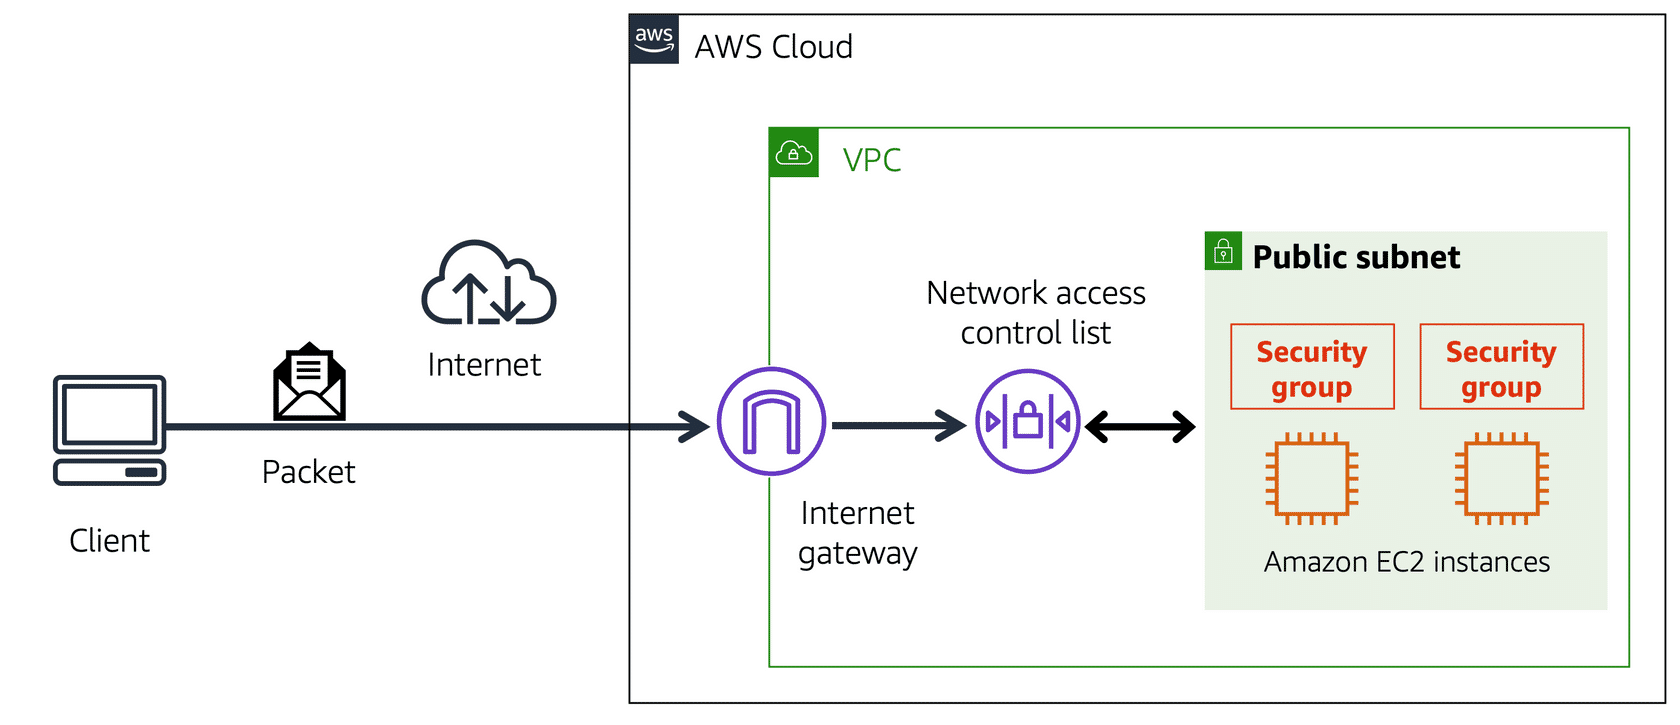


------------------------------------------------------------------------
📌 **Difference between public and private networking resources**
- **Public resources** are accessed with an internet gateway (IGW) which is a "door" that allows connection between a VPC and the internet.
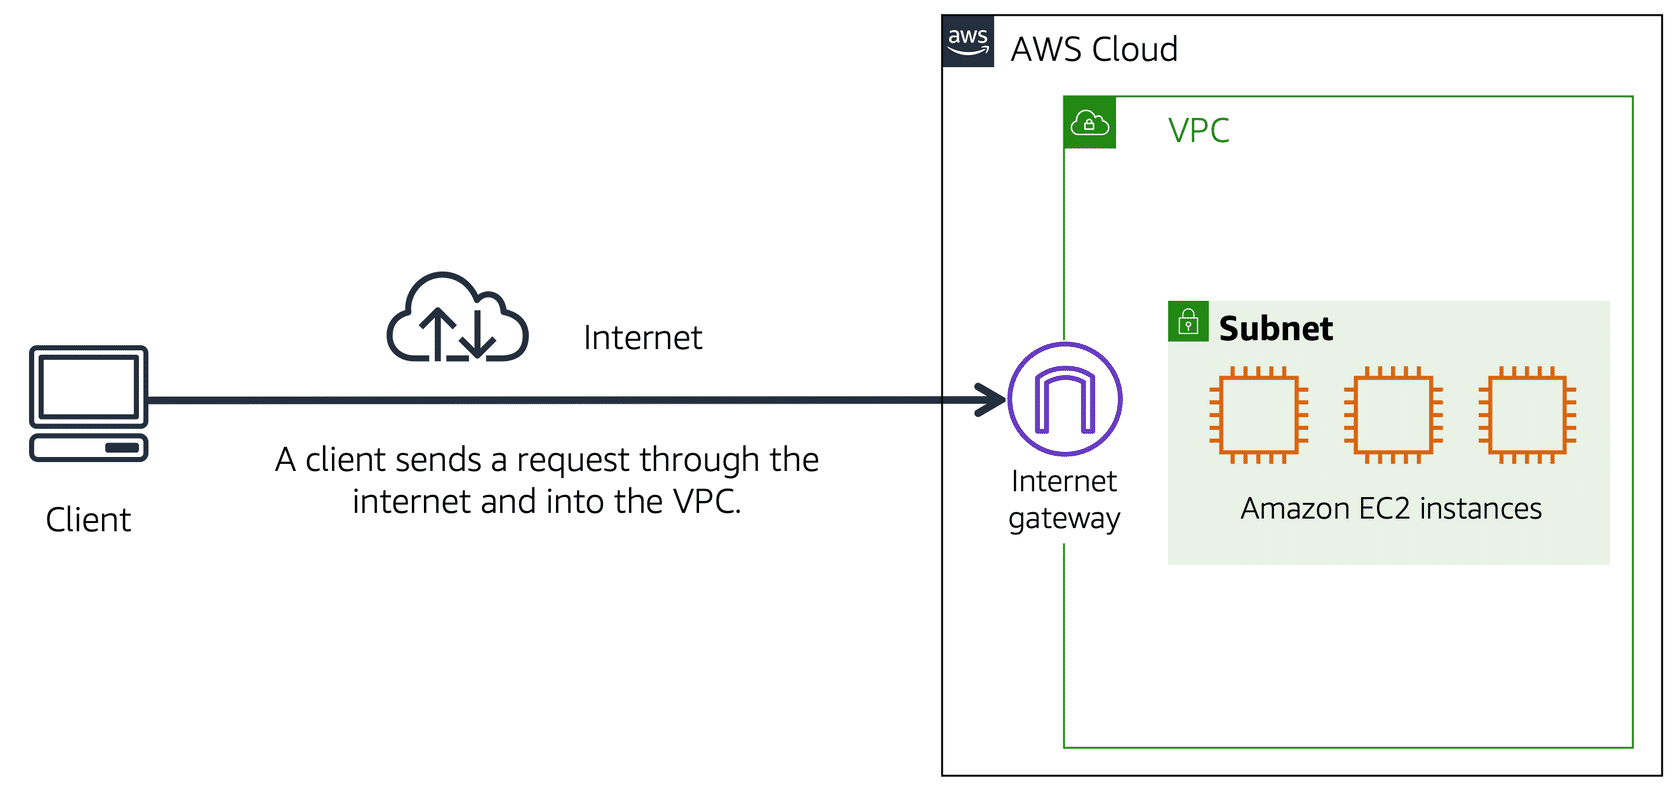
- **Private resources** are accessed with a virtual private gateway. The virtual private gateway is the component that allows protected internet traffic (=encrypted traffic with a VPN) to enter into the VPC.
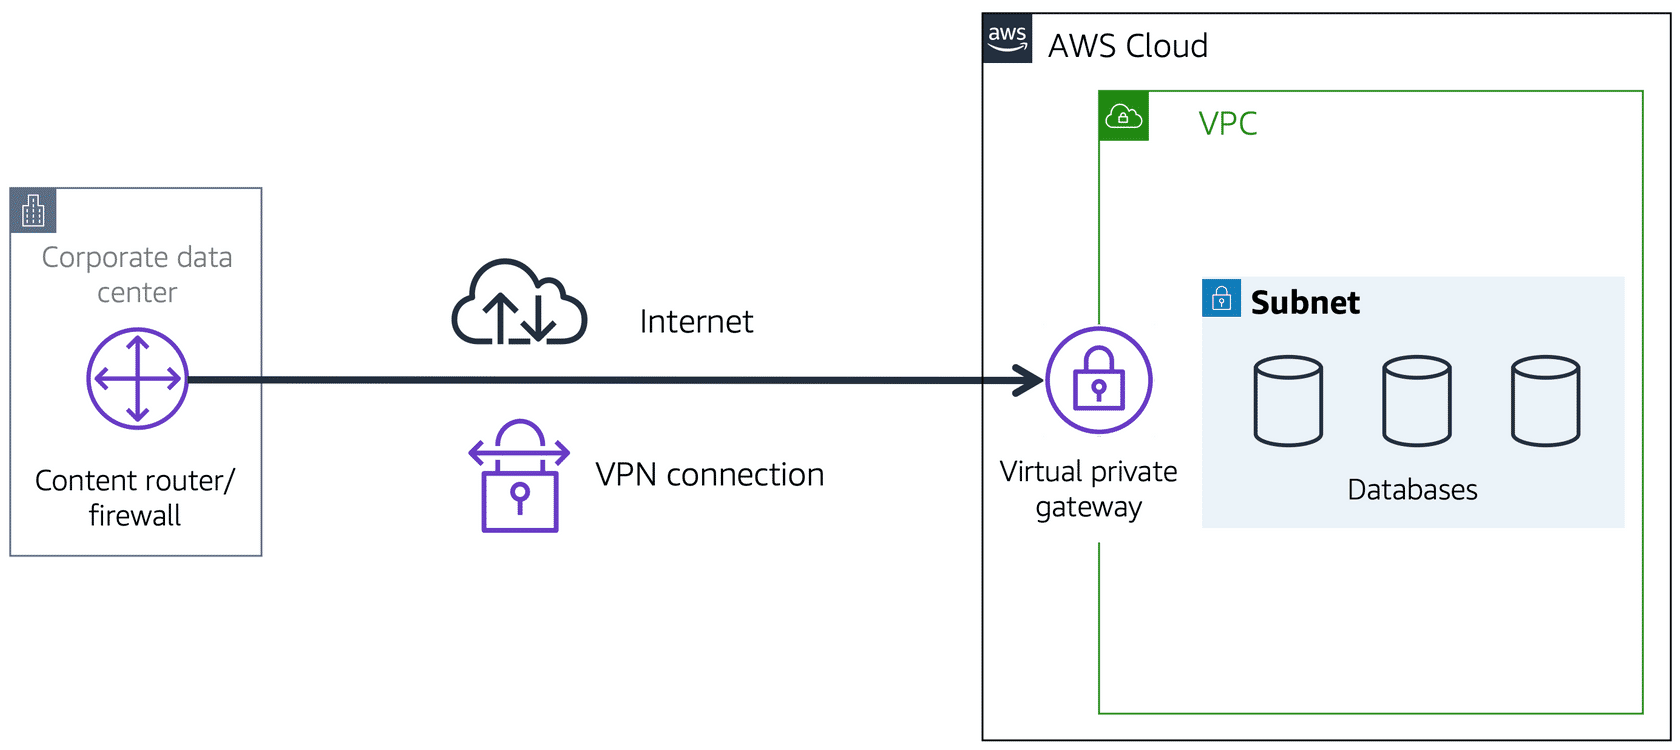

------------------------------------------------------------------------
📌**Global networking**\
**DNS = Domain Name System** =  a directory used for matching domain names to IP addresses.
DNS resolution is the process of translating a domain name to an IP address between a customer DNS resolver and a  company DNS server.
Amazon Route 53 is a DNS web service to route end users to internet applications hosted in AWS. 2 features :
1) It connects user requests to infrastructure running in AWS (such as Amazon EC2 instances and load balancers). It can route users to infrastructure outside of AWS.
2) manage the DNS records for domain names : register new domain names or transfer DNS existing records managed by other domain registers directly in Route 53. 

------------------------------------------------------------------------
📌**Services**
- **AWS Direct Connect** = allows you to establish a completely private, dedicated fiber connection from your data center to an AWS VPC. 
- **AWS Route 53** = DNS web service

## CHAPTER 4 : DATABASES & STORAGE

📌 **Instance store**\
An instance store provides **temporary block-level storage for an Amazon EC2 instance**. An instance store is disk storage that is physically attached to the host computer for an EC2 instance, and therefore has the same lifespan as the instance. When the instance is terminated, you lose any data in the instance store.

Amazon EC2 instances are virtual servers. If you start an instance from a stopped state, the instance might start on another host, where the previously used instance store volume does not exist. Therefore, **AWS recommends instance stores for use cases that involve temporary data that you do not need in the long term**.

------------------------------------------------------------------------
📌**Amazon Elastic Block Store (Amazon EBS)** \
To persist data, use an EBS volume.
Amazon Elastic Block Store (Amazon EBS)is a service that provides block-level storage volumes that you can use with Amazon EC2 instances. If you stop or terminate an Amazon EC2 instance, all the data on the attached EBS volume remains available.
Incremental backups of EBS volumes are called snapshots.
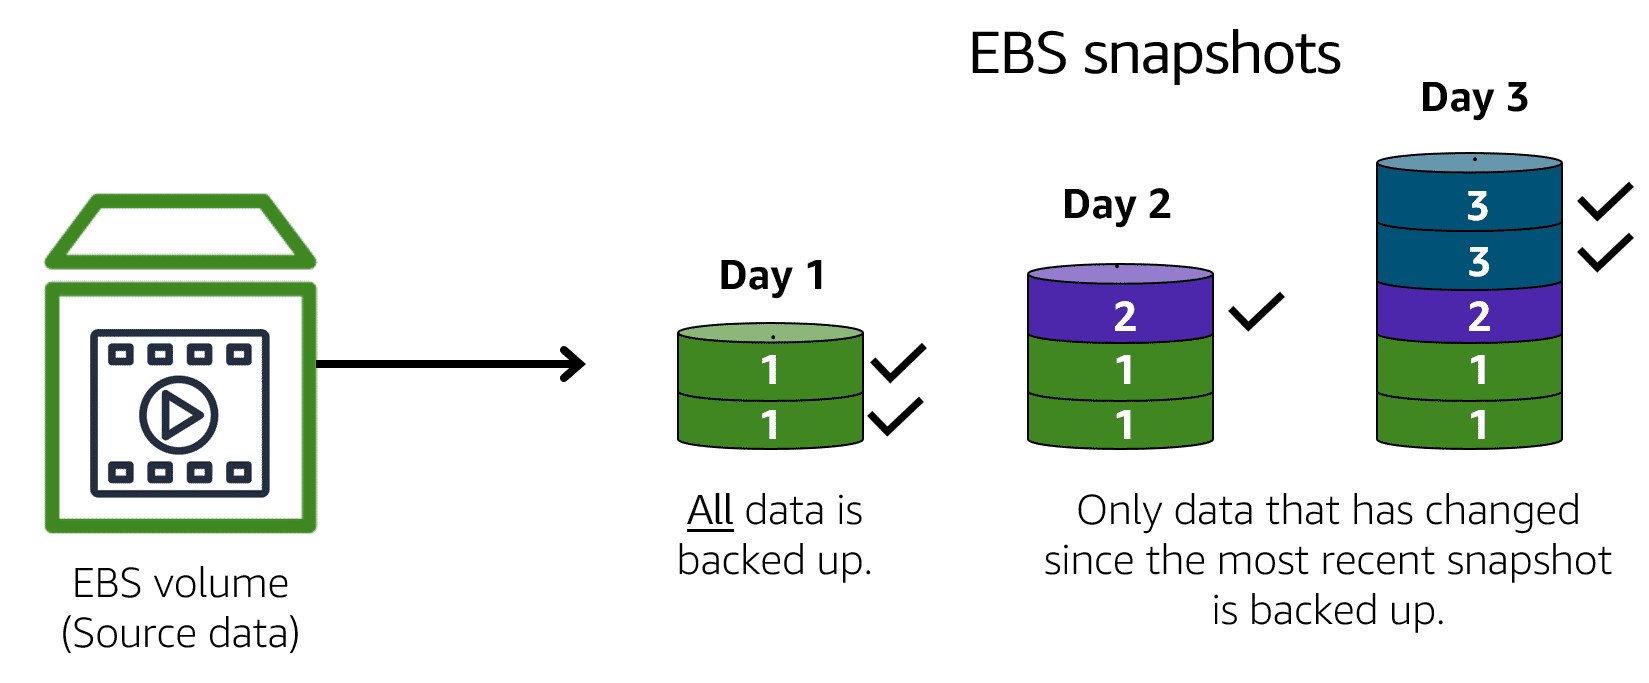

------------------------------------------------------------------------
📌**Amazon Simple Storage Service (Amazon S3)** \
A data store that allows you to store and retrieve a virtually unlimited amount of data at any scale.
In object storage, each object consists of data (img, video, txt, ...), metadata (informations about what the data is, how it is used, size, ...), and a key (unique identifier).
S3 = a service that provides object-level storage, web enabled (each object has a URL), regionally distributed (high availability), serveless (without an EC2 instance)

- Store data as objects (equivalent to a file)
- Store objects in buckets (equivalent to a directory)
- Max object size = 5 Tb
- Data is stored in at least 3 facilities.
- Possible to version objects to protect them from accidental deletion
- Possible to create multiple buckets
- Possible to create permissions to limit who can see or even access objects
- mechanisms for different storage use cases (classes) depending on 1) how often to retrieve data and 2) how available the data need to be :
   * S3 Standard :  Designed for frequently accessed data. Stores data in a minimum of three Availability Zones. Higher cost than other classes. Ex: for website hosting, data analytics.

   * S3 Standard-Infrequent Access or S3 Standard-IA = long term storage + quick access when needed. Store data in a minimum of three Availability Zones. Lower storage price and higher retrieval price than S3 Standard. Ex: for backups, disaster recovery files
   * S3 Glacier Flexible Retrieval = long term storage. 
   * S3 Glacier Deep Archive = lowest cost, for data retrieved once or two per year.
   * S3 Outposts : create S3 buckets on AWS S3 Outposts environement, keeping data close to on-premises apps.

Write Once / Read Many (WORM).
Amazon S3 Lifecycle management move data automatically between tiers (ex: S3 Standard --> S3 Standard-IA --> S3 Glacier).

object storage vs block storage vs file storage : 
- **object** = treats any file as a complete, discreet object. So every time there's a change to the object, you must re-upload the entire file. There are no delta updates. Uses cases where occasional changes are made. A good article about what is Object Storage : https://aws.amazon.com/what-is/object-storage/  
- **block** =  Block storage breaks those files down to small component parts or blocks. Delta updates. Uses cases where complex read, write, change functions are done.
- **file** = a storage server uses block storage with a local file system to organize files. Multiple clients can access data that is stored in shared file folders. Ideal for use cases in which a large number of services and resources need to access the same data at the same time.

------------------------------------------------------------------------
📌**Amazon Elastic File System (Amazon EFS)** \
Amazon Elastic File System (Amazon EFS) is a scalable file system used with AWS Cloud services and on-premises resources. As you add and remove files, Amazon EFS grows and shrinks automatically. It can scale on demand to petabytes without disrupting applications. 

Characteristics = uses a file storage, regional service, stores data in multiple AZ, can be accessed by on-premises servers with AWS Direct Connect.

------------------------------------------------------------------------
📌**Amazon Relational Database Service (Amazon RDS)** \
RDS = a managed service that enables to run relational databases in the AWS Cloud. Objective : spend less time completing administrative tasks.
Characteristics : Automated patching, hardware provisionning, database setup and backups, redundancy, failover, disaster recovery, integrates with other services (ex with AWS Lambda to query RDS from a serverless app), encryption at rest and in transit.
Supported database engines : Amazon Aurora, PostgreSQL, MySQL, MariaDB, Oracle, Micosoft SQL Server

Amazon Aurora = enterprise-class relational database. The most managed relational database option. It supports MySQL and PostgreSQL (it is faster), replication accross 3 AZ so highly available, backup to S3 and low cost because reduces unnecessary I/O.

------------------------------------------------------------------------
📌**Amazon DynamoDB**
* Serverless NoSQL database, (key-value store)
* Fully managed
* Very quick in response time to queries
* Highly scalable (automatic scaling)

------------------------------------------------------------------------
📌**Amazon Redshift** \
Data warehousing as a service for Big DataAanalytics. It offers the ability to collect data from many sources and helps to understand relationships and trends across data.

------------------------------------------------------------------------
📌**AWS Database Migration Service (AWS DMS)** \

AWS Database Migration Service enables to :
1) migrate relational databases, nonrelational databases, and other types of data stores = Move data securely between source database and target database.
During migration, the source database remains operational
2) Develop and test database migrations
3) Consolidate multiple databases into a single database
4) Continuous replication : perform continuous data replication to other target sources instead of doing a one-time migration

------------------------------------------------------------------------
📌**Additional database services** \
- Amazon DocumentDB = NoSQL Document database (for content management, user profiles, catalogs)
- Amazon Neptune = NoSQL Graph database (for recommandation engines, knowledge graph, social networks, fraud detection)
- Amazon Quantum Ledger Database (QLDB) = immutable system of record where any entry can never be removed from the audits.
- Amazon ElastiCache = adding caching layers on top of your databases to help improve the read times of common requests. 
- Amazon DB Accelerator (DAX) = in-memory cache for DynamoDB designed to dramatically improve read times for your nonrelational data

------------------------------------------------------------------------
📌**Summary** \
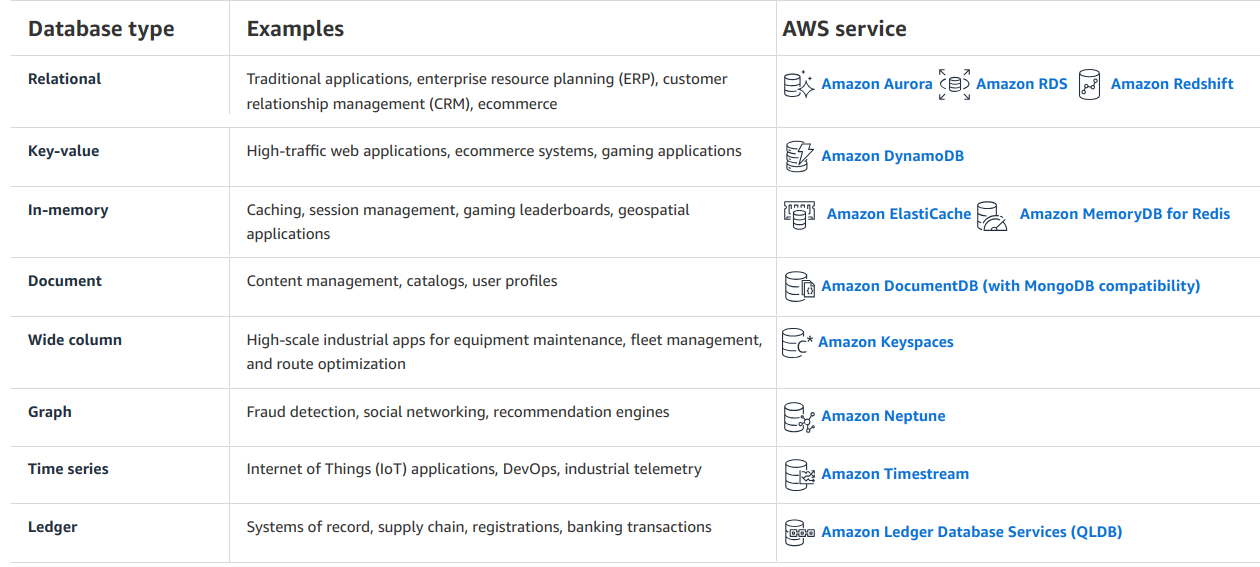

## CHAPTER 5 : SECURITY

📌**Shared Responsibility Model** \
You can think of this model as being similar to the division of responsibilities between a homeowner and a homebuilder. The builder (AWS) is responsible for constructing your house and ensuring that it is solidly built. As the homeowner (the customer), it is your responsibility to secure everything in the house by ensuring that the doors are closed and locked. 

- Customers : are responsible for the security of everything that they create and put in the AWS Cloud.
- AWS :  is responsible for security of the cloud: (host operating system, virtualization layer, and even the physical security of the data centers from which services operate)

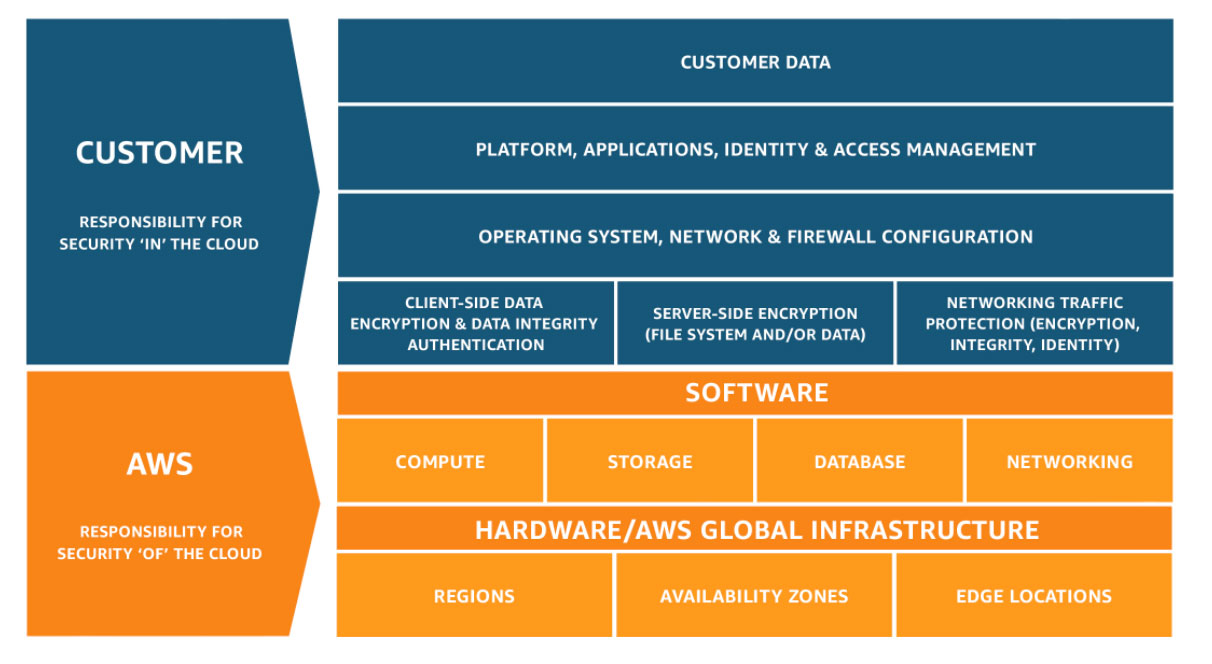

------------------------------------------------------------------------
📌AWS Identity and Access Management (IAM)

**AWS account root user** = When you first create an AWS account, you begin with an identity known as the "root user". It can access and control any resource in the account. 

*Best practices :* 
- *Do not use the root user for everyday tasks. Instead, use the root user to create your first IAM user and assign it permissions to create other users. Only use the root user when you need to perform a limited number of tasks that are only available to the root user (ex: changing root user email address, changing AWS support plan).*
- *Turn on MFA as soon as you create an AWS account and log in with your root user.*

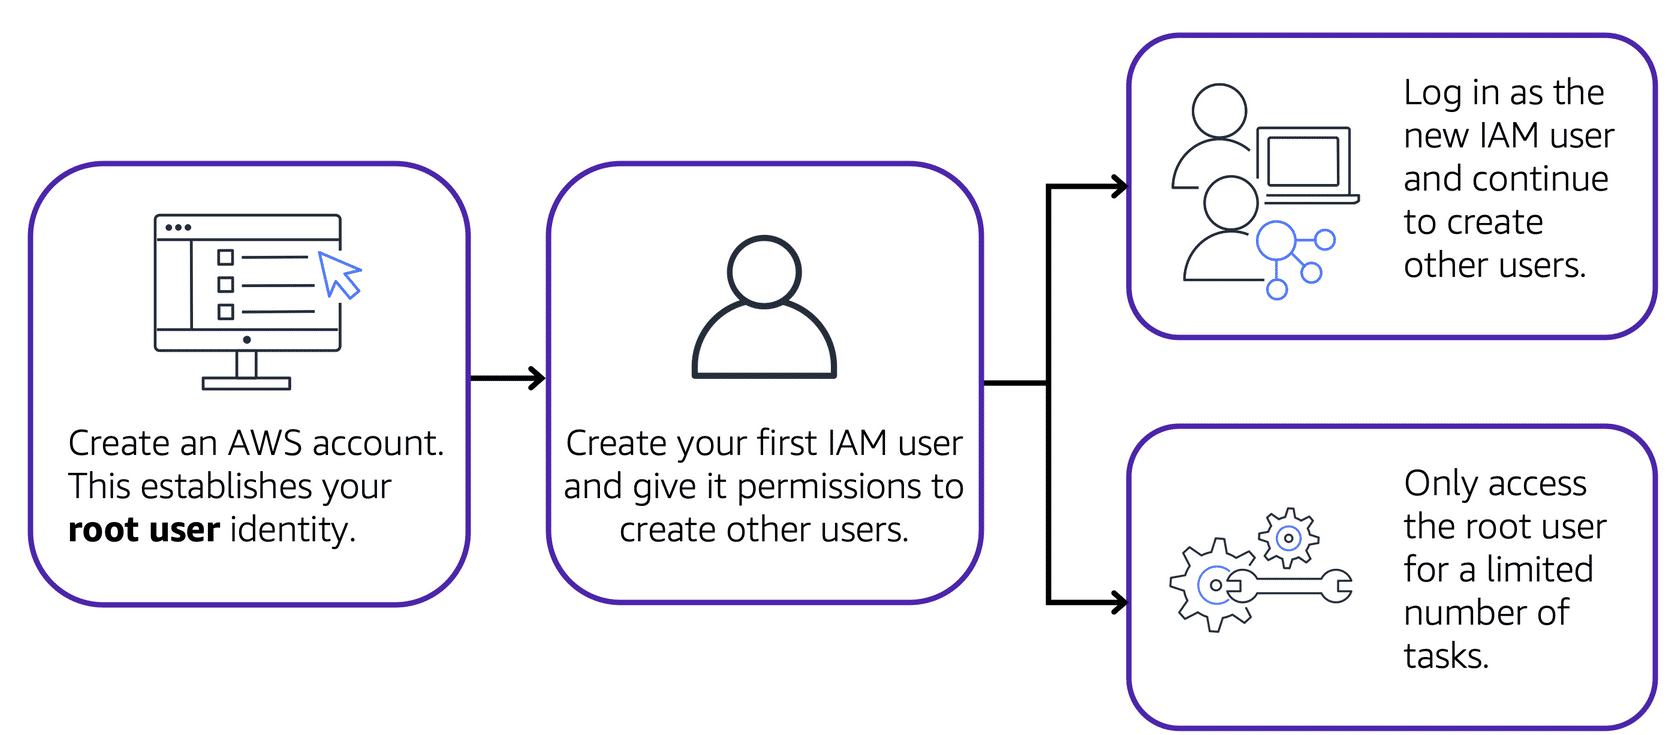

AWS Identity and Access Management (IAM) =  manage access to AWS services and resources securely. Authentication and authorization as a service.
- **IAM users** : an identity that you create in AWS. It represents the person or application that interacts with AWS services and resources. It consists of a name and credentials. *Best practice : Create individual IAM users for each person who needs to access AWS.*  
- **IAM policies** : a JSON document that allows or denies permissions to AWS services and resources. IAM policies enable you to customize users’ levels of access to resources. *Best practice : Follow the security principle of least privilege when granting permissions = a user is granted access only to what they need.*.\
    In the policy, we need to specify 3 items : **Effect** = Allow or Deny // **Action** = any AWS API call // **Resource** = wich AWS resource tha API call is for \
    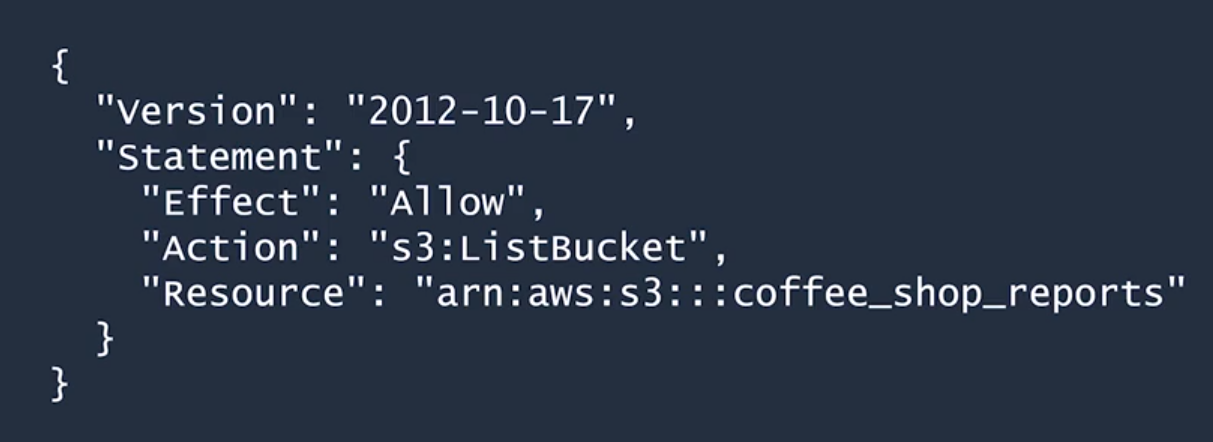
    Exemple of a policy that has the **effect** as "allow", the **action** as "s3:ListBucket" and the **resource** is a unique id for a s3 bucket 
- **IAM groups** : a collection of IAM users. When you assign an IAM policy to a group, all users in the group are granted permissions specified by the policy.
- **IAM roles** : an identity that you can assume to gain temporary access to permissions. When someone (a user, an AWS resource, AWS service, external identity, application, ...) assumes an IAM role, they abandon all previous permissions that they had under a previous role and assume the permissions of the new role. IAM roles are ideal for situations in which access to services or resources needs to be granted temporarily, instead of long-term. Is is similar to a user, but has no username or password.
- **MFA** :  provides an extra layer of security for your AWS account. As a best practice, enable MFA for the root user and all IAM users in your account. By doing this, you can keep your AWS account safe from unauthorized access.

------------------------------------------------------------------------
📌**AWS Organizations**\
A central location to manage multiple AWS accounts.
- Centralized management
- Consolidated billing for all member accounts : use the primary account of your organization to pay for all member accounts
- Hierarchical groupings of accounts into Organizational Units (OU). When you apply a policy to an OU, all the accounts in the OU automatically inherit the permissions specified in the policy.  
- Control over the AWS services + API actions that each account can access via Service Control Policies (SCPs). SCP never grants permissions. Instead, SCPs are JSON policies that specify the maximum permissions for the affected accounts. An SCP affects all IAM users, groups, and roles within an account, including the AWS account root user. SCPs don't affect resource-based policies directly. They also don't affect users or roles from accounts outside the organization. A good resource that provide an example of an SCP : https://docs.aws.amazon.com/organizations/latest/userguide/orgs_manage_policies_scps.html

------------------------------------------------------------------------
📌**Security policies & Compliance**

**AWS Artifact** =  a service that provides on-demand access to AWS security and compliance reports and select online agreements. AWS Artifact consists of two main sections: 
- *AWS Artifact Agreements* : review, accept, and manage agreements for an individual account and for all your accounts in AWS Organizations. Different types of agreements are offered to address the needs of customers who are subject to specific regulations
- *AWS Artifact Reports* : provide compliance reports from third-party auditors.


To read: AWS Risk and Security Whitepaper located at AWS Compliance https://aws.amazon.com/fr/compliance/
https://aws.amazon.com/fr/compliance/faq/
https://aws.amazon.com/fr/compliance/customer-center/

------------------------------------------------------------------------
📌**DDoS** 

A denial-of-service (DoS) attack is a deliberate attempt to make a website or application unavailable to users by flooding it with excessive network traffic until the targeted website/app becomes overloaded and is no longer able to respond. If it becomes unavailable, this denies service to users who are trying to make legitimate requests.

In a distributed denial-of-service (DDoS) attack, multiple sources are used to start an attack that aims to make a website or application unavailable. 
**How to combat them ? by using an Elastic Load Balancer (which is a region service), security group, AWS Shield, AWS WAF**

AWS Shield is a service that protects applications against DDoS attacks. AWS Shield provides two levels of protection: 
- Standard : automatically protects all AWS customers at no cost. It protects your AWS resources from the most common, frequently occurring types of DDoS attacks. 
- Advanced : a paid service that provides detailed attack diagnostics and the ability to detect and mitigate sophisticated DDoS attacks. 

------------------------------------------------------------------------
📌**Additional AWS services for application security and encryption**\
Encryption = securing data in a way that only authorized parties can access it. 
* Encryption at rest : for example, server-side encryption at rest is enabled on all DynamoDB table data. It integrates with AWS KMS (Key Management Service) that allow to perform encryption operations through the use of cryptographic keys and manage them.With AWS KMS, you can choose the specific levels of access control that you need for your keys. For example, you can specify which IAM users and roles are able to manage keys. Alternatively, you can temporarily disable keys so that they are no longer in use by anyone. Your keys never leave AWS KMS, and you are always in control of them.
* Encryption in transit : Secure Sockets Layer (SSL)

- **AWS WAF** : a web application firewall that lets you monitor network requests that come into your web applications. It is basically a web Access Control List (ACL) that can block or allow network requests.

- **Amazon Inspector** : perform automated security assessments against your infrastructure. It helps to improve the security and compliance of applications. It checks applications for security vulnerabilities and deviations from security best practices, such as open access to Amazon EC2 instances and installations of vulnerable software versions. 

- **Amazon GuardDuty** :  a service that provides intelligent threat detection for your AWS infrastructure and resources. It identifies threats by continuously monitoring the network activity and account behavior within your AWS environment. GuardDuty continuously analyzes data from multiple AWS sources, including VPC Flow Logs and DNS logs. If GuardDuty detects any threats, you can review detailed findings about them from the AWS Management Console. Findings include recommended steps for remediation. You can also configure AWS Lambda functions to take remediation steps automatically in response to GuardDuty’s security findings.

To read: 
- Security best practices in IAM : https://docs.aws.amazon.com/IAM/latest/UserGuide/best-practices.html
- Best Practices for Security, Identity, & Compliance : https://aws.amazon.com/architecture/security-identity-compliance/?nc1=h_ls&cards-all.sort-by=item.additionalFields.sortDate&cards-all.sort-order=desc&awsf.content-type=*all&awsf.methodology=*all

## CHAPTER 6 : MONITORING & ANALYTICS

📌**Monitoring**

Observing systems, collecting metrics, evaluating those metrics over time, and then using them to make decisions or take actions.

------------------------------------------------------------------------
📌**Amazon CloudWatch**

**Amazon CloudWatch** = a web service that enables you to monitor your AWS infrastructure and the applications you run on AWS in real time. 
How it works ? AWS services send metrics to CloudWatch. CloudWatch then uses these metrics to create graphs automatically that show how performance has changed over time. 

Alarm system : with CloudWatch, you can create alarms that automatically perform actions if the value of your metric has gone above or below a predefined threshold. And then we can perform an action. When configuring the alarm, you can specify to receive a notification whenever this alarm is triggered.

Benefits : central location for all your metrics( with the dashboard), gain visibilty into all applications, infrastructures and services, reduce mean time to resolution (MTTR) and improve total cost of ownership (TCO), insights to optimize applications and resources. 

Features : 
- Monitor your AWS infrastructure and resources in real time
- View metrics and graphs to monitor the performance of resources
- Configure automatic actions and alerts in response to metrics
------------------------------------------------------------------------
📌**AWS CloudTrail**

**Amazon CloudTrail** = Comprehensive API auditing tool : every requests gets logged in the CloudTrail engine. Recorded info = type of event, identity of the API caller, time of the API call, source IP address of the API caller, ...
Events are typically updated in CloudTrail within 15 minutes after an API call.

Features : 
- Track user activities and API requests throughout your AWS infrastructure
- Filter logs to assist with operational analysis and troubleshooting

CloudTrail Insights : within CloudTrail, you can also enable CloudTrail Insights. This optional feature allows CloudTrail to automatically detect unusual API activities in your AWS account.

------------------------------------------------------------------------
📌**AWS Trusted Advisor**

**Amazon Trusted Advisor** =  a web service that automatically inspects your AWS environment and provides real-time recommendations in accordance with AWS best practices. 
There 5 categories of best practices : Cost optimization, Performance, Security, Fault tolerance, Service limits.

For the checks in each category, Trusted Advisor offers a list of recommended actions and additional resources to learn more about AWS best practices. We can view them in the AWS Console.
Green check = no problems / Orange triangle = recommended investigations / Red circle = recommended actions.

Some check are free / Other are available depending on the level of your support plan


## CHAPTER 7 : PRICING & SUPPORT

📌**AWS Free Tier**

AWS Free Tier enables you to begin using certain services without having to worry about incurring costs for the specified period. 
3 types of offers are available : 
1) Always free to all AWS customers (ex: AWS Lambda offers 1M invocations / month)
2) 12 months free from account creation date (ex: S3 offers up to 5Go of S3 Standard for 12 months)
3) Short term free trial which start from the date you activate a particular service (ex : AWS Lightsail offers 1 month trial of up to 750 hours of usage)

------------------------------------------------------------------------
📌**AWS pricing concepts**

AWS offers a range of cloud computing services with pay-as-you-go pricing. There are 3 categories of pricing : 
- Pay for what you use = you pay for exactly the amount of resources that you actually use, without requiring long-term contracts or complex licensing. 
- Pay less when you reserve = some services offer reservation options that provide a significant discount compared to On-Demand Instance pricing (ex: EC2 saving plans and reserved instance).
- Pay less with volume-based discounts when you use more = some services offer tiered pricing, so the per-unit cost is incrementally lower with increased usage.

**AWS Pricing Calculator** = lets you explore AWS services and create an estimate for the cost of your use cases on AWS.

Examples : 
- For AWS Lambda, you are charged based on the number of requests for your functions and the time that it takes for them to run.
- With Amazon EC2, you pay for only the compute time that you use while your instances are running.

Whitepaper about pricing : https://docs.aws.amazon.com/whitepapers/latest/how-aws-pricing-works/abstract-and-introduction.html

------------------------------------------------------------------------
📌**AWS Organizations & consolidated billing**

The consolidated billing feature of AWS Organizations enables you to receive a single bill for all AWS accounts in your organization.
By consolidating, you can easily track the combined costs of all the linked accounts in your organization. 

Benefits : 
- Simplifies billing process
- Share savings across accounts (bulk discount pricing, Savings Plans, Reserved Instances). AWS allocates each linked account a portion of the overall volume discount based on the account's usage. 
- Free feature (up to 4 accounts in the organization)


------------------------------------------------------------------------
📌**AWS Budgets**

Billing service provide a cost management dashboard in order to pay your AWS bill, monitor your usage, and analyze and control your costs.

In AWS Budgets you can create budgets to plan your service usage, service costs, and instance reservations. The information in AWS Budgets updates three times a day. Alert can be set when the usage exceeds a chosen threshold.
How to go to Budget ? AWS Console --> Billing --> Budgets --> Create budget

------------------------------------------------------------------------
📌**AWS Cost Explorer**

**AWS Cost Explorer** = a tool that lets you visualize, understand, and manage your AWS costs and usage over time.

How to go to Budget ? AWS Console --> search bar "Cost Explorer" --> Cost Explorer
In the dashboard, we can visualize data by Region, by tag, ...

------------------------------------------------------------------------
📌**AWS Support plans**

- **Basic** : free for all AWS customers + access to whitepapers, docs & forums + AWS customer service for billing questions and service limit increases + a limited selection of AWS Trusted Advisor checks + AWS Personal Health Dashboard (a tool that provides alerts and remediation guidance when AWS is experiencing events that may affect you)

AWS offers 4 different Support plans to help you troubleshoot issues, lower costs, and efficiently use AWS services. These Support plans have Basic Support +  the ability to open an unrestricted number of technical support cases. Payment = pay-by-the-month pricing and require no long-term contracts : 
- **Developer** : lowest cost + email access to customer support  (24h response time or 12h is production is impaired) + best practice guidance + Client-side diagnostic tools + Building-block architecture support, which consists of guidance for how to use AWS offerings, features, and services together
- **Business** : middle cost + all features of Developer plan + use-case guidance + all AWS Trusted Advisor checks + direct phone access to cloud support engineers (4h response time or 1h if production is down) + Limited support for third-party software, such as common operating systems and application stack components
- **Enterprise On-Ramp** : middle cost, Basic & Developer & Business plans + a pool of Technical Account Managers to provide proactive guidance and coordinate access to programs and AWS experts + a Cost Optimization workshop (one per year) + a Concierge support team for billing and account assistance + tools to monitor costs and performance through Trusted Advisor and Health API/Dashboard + 30 min response time
- **Enterprise Support** : highest cost + all features included in the previous support plans + a designated Technical Account Manager + Operations Reviews and tools to monitor health + Training and Game Days to drive innovation + 15 min response time

More details : https://aws.amazon.com/premiumsupport/plans/

------------------------------------------------------------------------
📌**AWS Marketplace**

**AWS Marketplace** = a digital catalog that includes thousands of software listings from independent software vendors. You can use AWS Marketplace to find, test, and buy software that runs on AWS. https://aws.amazon.com/marketplace



## CHAPTER 8 : MIGRATION & INNOVATION

**📌 AWS Cloud Adoption Framework (AWS CAF)**

6 core Perspectives : 
1) [business] **Business** => The Business Perspective ensures that IT aligns with business needs and that IT investments link to key business results. The Business Perspective helps you to move from a model that separates business and IT strategies into a business model that integrates IT strategy. Use the Business Perspective to create a strong business case for cloud adoption and prioritize cloud adoption initiatives. Common roles includes : business managers, finance managers, budget owners, strategy stakeholders

2) [business] **People** => The People Perspective supports development of an organization-wide change management strategy for successful cloud adoption. Use the People Perspective to evaluate organizational structures and roles, new skill and process requirements, and identify gaps. This helps prioritize training, staffing, and organizational changes. Common roles includes : HR, Staffing

3) [business] **Governance** => The Governance Perspective focuses on the skills and processes to align IT strategy with business strategy. This ensures that you maximize the business value and minimize risks. Use the Governance Perspective to understand how to update the staff skills and processes necessary to ensure business governance in the cloud. Manage and measure cloud investments to evaluate business outcomes. Common roles includes : CIO, Portfolio managers, business analysts, enterprise architects

4) [technical] **Platform** => The Platform Perspective includes principles and patterns for implementing new solutions on the cloud, and migrating on-premises workloads to the cloud. Use a variety of architectural models to understand and communicate the structure of IT systems and their relationships. Describe the architecture of the target state environment in detail. Common roles : CTO, IT managers, solutions architects.

5) [technical] **Security** => The Security Perspective ensures that the organization meets security objectives for visibility, auditability, control, and agility.  Use the AWS CAF to structure the selection and implementation of security controls that meet the organization’s needs. Common roles : IT security managers, RSSI.

6) [technical] **Operations** => The Operations Perspective helps you to enable, run, use, operate, and recover IT workloads to the level agreed upon with your business stakeholders. Define how day-to-day, quarter-to-quarter, and year-to-year business is conducted. Align with and support the operations of the business. The AWS CAF helps these stakeholders define current operating procedures and identify the process changes and training needed to implement successful cloud adoption.

==> Each Perspective is used to uncover gaps in your skills and processes, which serves as a basis to build an AWS CAF Action Plan. This helps guide your organization for cloud migration. 

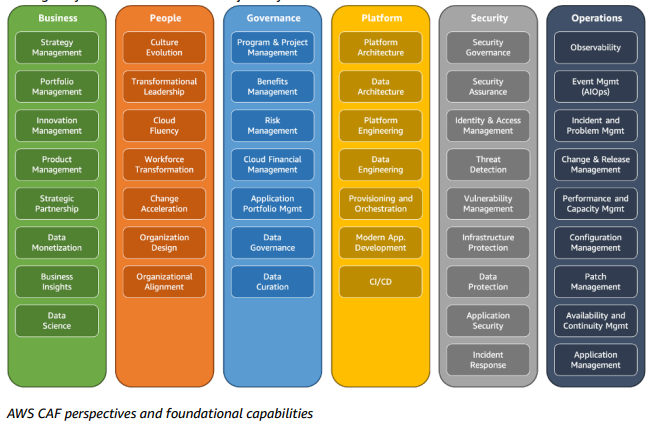

More resources : 
* Link to the AWS CAF whitepaper : https://docs.aws.amazon.com/pdfs/whitepapers/latest/overview-aws-cloud-adoption-framework/overview-aws-cloud-adoption-framework.pdf
* New version : https://d1.awsstatic.com/whitepapers/aws-caf-ebook.pdf

------------------------------------------------------------------------
**📌 Migration strategies**

6 R's of migration : The R's represent different strategies on moving solutions to the cloud

1) **Rehosting** (lift-and-shift) : easy, not making any changes. Move the legacy applications on AWS "as-is" => for large legacy migration scenario. Involves moving applications without changes. In the scenario of a large legacy migration, in which the company is looking to implement its migration and scale quickly to meet a business case, the majority of applications are rehosted. 

2) **Replatforming** (lift, tinker, and shift) : few cloud optimizations, **without any core code changes in the process** (no new dev). Ex : from MySQL instance to RDS MySQL without any code change at all. Involves making a few cloud optimizations to achieve tangible benefits in the cloud without changing the core architecture of the application.

3) **Retire** : Applications that are no longer being used or that can be turned off are removed while migrating to the cloud => apps not going into AWS.

4) **Retain** : Applications that could be migrated but not for now => apps not going into AWS. Keeping applications that are critical for the business in the source environment. This might include applications that require major refactoring before they can be migrated, or, work that can be postponed until a later time.

5) **Repurchasing** : change software package from an old vendor to a brand new one (new vendor or cloud service) = replacing an existing application with a cloud-based version, such as software found in AWS Marketplace = moving from a traditional license to a software-as-a-service model. Ex : moving from a CRM sytem to Salesforce.com.

6) **Refactoring** (re-architecting) : write new code to add perf/features driven by strong business need => high cost in planning and human efforts. Involves reimagining how an application is architected and developed by using cloud-native features. Refactoring is driven by a strong business need to add features, scale, or performance that would otherwise be difficult to achieve in the application’s existing environment.

More ressources : https://aws.amazon.com/fr/blogs/enterprise-strategy/6-strategies-for-migrating-applications-to-the-cloud/

------------------------------------------------------------------------
**📌 AWS Snow Family (data migration solutions)**
How to move massive amounts of data into AWS without going over the network ?
The AWS Snow Family is a collection of **physical devices** that help to physically transport **(by shipment !!)** up to exabytes of data into and out of AWS. Principle : Fill in a physical device with your data and have it shipped back to AWS who then uploads it for you.
Theses devices are secure and tamper-resistant wether on site and in transit. The hardware and software is cryptographically signed, and all data stored is automatically encrypted (with 256bits encryption keys).

- AWS Snowcone : small, rugged, and secure edge computing and data transfer device. 2 CPUs, 4Go RAM, can hold up to 14 Terabytes of data.
- AWS Snowball Edge : 2 types of devices with 80 To of HDD capacity 
    * Compute optimized. : + 1 To SSD and 40CPUs and 80Go RAM. It provides powerful computing resources for use cases such as machine learning, full motion video analysis, analytics, and local computing stacks.
    * Storage optimized : for large-scale data migrations and recurring transfer workflows, in addition to local computing with higher capacity needs
- AWS Snowmobile : + 104 CPUs and 416Go RAM. The largest service used to move large amounts of data to AWS. You can transfer up to 100 petabytes (100 000 To) of data per Snowmobile, a 45-foot long ruggedized shipping container, pulled by a semi trailer truck.
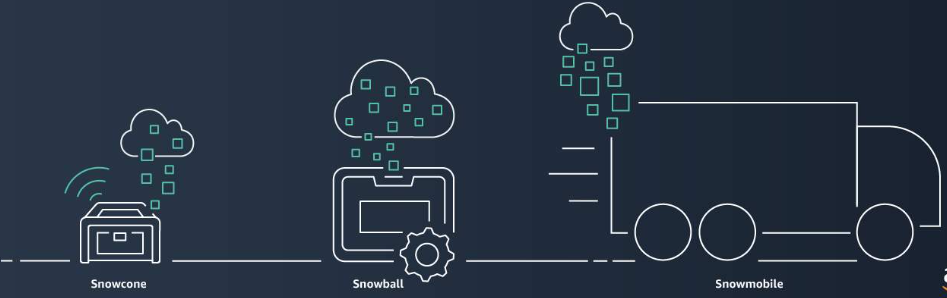

------------------------------------------------------------------------
**📌 Innovative solutions**
* Serverless apps : Serverless = applications that don’t require to provision, maintain, or administer servers. You don’t need to worry about fault tolerance or availability. AWS handles these capabilities for you.**AWS Lambda** is use to run serverless applications. If you design your architecture to trigger Lambda functions to run your code => you can bypass the need to manage a fleet of servers. Building your architecture with serverless applications enables your developers to focus on their core product instead of managing and operating servers
* AI : Convert speech to text with Amazon Transcribe. Discover patterns in text with Amazon Comprehend. Identify potentially fraudulent online activities with Amazon Fraud Detector. Build voice and text chatbots with Amazon Lex.
* ML : Traditional machine learning (ML) development is complex, expensive, time consuming, and error prone. AWS offers **Amazon SageMaker** to remove the difficult work from the process and empower you to build, train, and deploy ML models quickly. You can use ML to analyze data, solve complex problems, and predict outcomes before they happen.



## CHAPTER 9 : WELL-ARCHITECTED

## CHAPTER 10 : EXAM

CloudQuest : https://cloudquest.skillbuilder.aws/?refresh=true
Exam guide : https://d1.awsstatic.com/training-and-certification/docs-cloud-practitioner/AWS-Certified-Cloud-Practitioner_Exam-Guide.pdf

The AWS Certified Cloud Practitioner exam consists of **65 questions** to be completed in **90 minutes**. The minimum passing score is **700** (the maximum score is 1,000). There are 2 types of questions : multiple-choice (only 1 correct answer out of 4) and multiple-response (2 or more correct responses out of 5).

Example questions : https://d1.awsstatic.com/training-and-certification/docs-cloud-practitioner/AWS-Certified-Cloud-Practitioner_Sample-Questions.pdf

The 4 domains and their weights : \
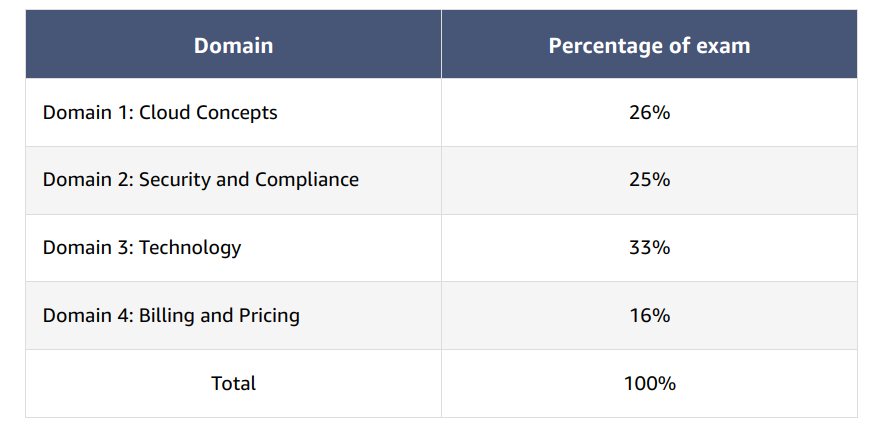


As part of your preparation for the AWS Certified Cloud Practitioner exam, we recommend that you review the following whitepapers and resources:

- Overview of Amazon Web Services : https://d1.awsstatic.com/whitepapers/aws-overview.pdf
- How AWS Pricing Works : https://docs.aws.amazon.com/whitepapers/latest/how-aws-pricing-works/abstract-and-introduction.html
- Compare AWS Support Plans : https://aws.amazon.com/premiumsupport/plans/